In [1]:
import pandas as pd
from matplotlib import colormaps
import matplotlib.pyplot as plt

In [2]:
HeartRate = pd.read_csv('heart_disease_uci.csv', index_col = 0)
HeartRate['target'] = 0
for i in range(1, 921):
    if (HeartRate.loc[i, 'num'] == 0):
        continue
    else:
        HeartRate.loc[i, 'target'] = 1
HeartRate

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
id,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1


<Axes: xlabel='thalch', ylabel='age'>

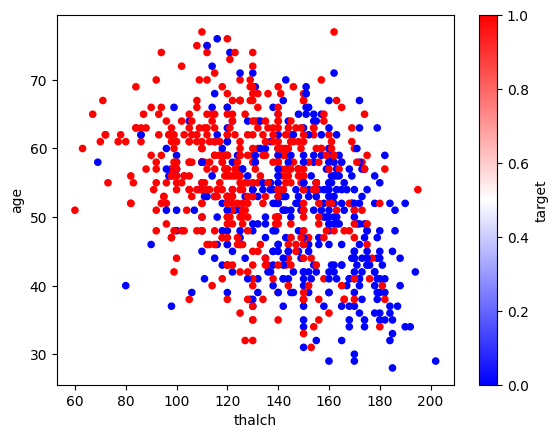

In [21]:
HeartRate.plot.scatter(x = 'thalch', y = 'age', c = 'target', cmap = 'bwr')

<Axes: xlabel='thalch', ylabel='trestbps'>

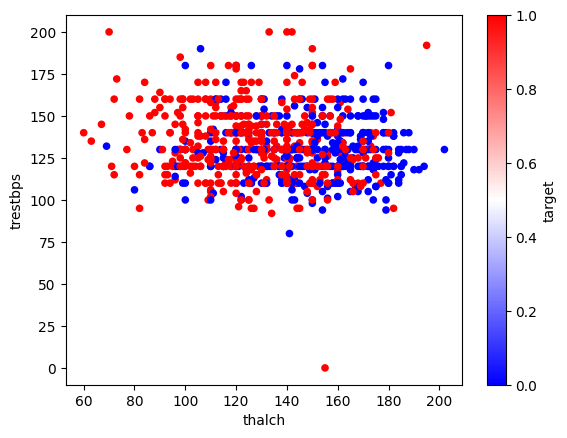

In [23]:
HeartRate.plot.scatter(x = 'thalch', y = 'trestbps', c = 'target', cmap = 'bwr')

In [4]:
HeartRate.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
dtype: int64

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='thalch', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='num', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='trestbps'>,
        <Axes: xlabel='trestbps', ylabel='trestbps'>,
        <Axes: xlabel='chol', ylabel='trestbps'>,
        <Axes: xlabel='thalch', ylabel='trestbps'>,
        <Axes: xlabel='oldpeak', ylabel='trestbps'>,
        <Axes: xlabel='ca', ylabel='trestbps'>,
        <Axes: xlabel='num', ylabel='trestbps'>,
        <Axes: xlabel='target', ylabel='trestbps'>],
       [<Axes: xlabel='age', ylabel='chol'>,
        <Axes: xlabel='trestbps', ylabel='chol'>,
        <Axes: xlabel='chol', ylabel='chol'>,
        <Axes: xlabel='thalch', ylabel='chol'>,
        <Axes: xlabel='oldpeak', yl

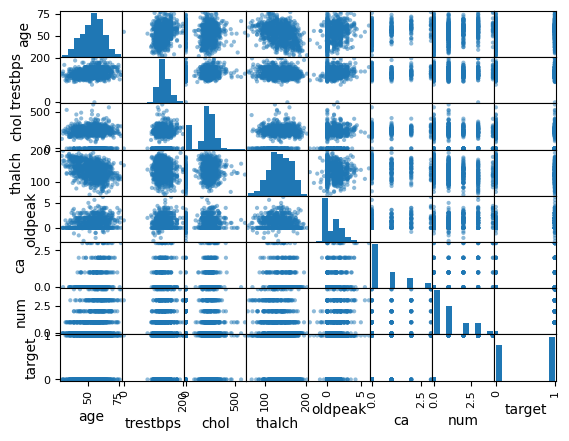

In [5]:
pd.plotting.scatter_matrix(HeartRate)

/var/folders/77/ghzzgv716b55f3b_78r7dkww0000gn/T/ipykernel_1368/3228701579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'TargetCode'] = df_clean['target'].astype('category').cat.codes


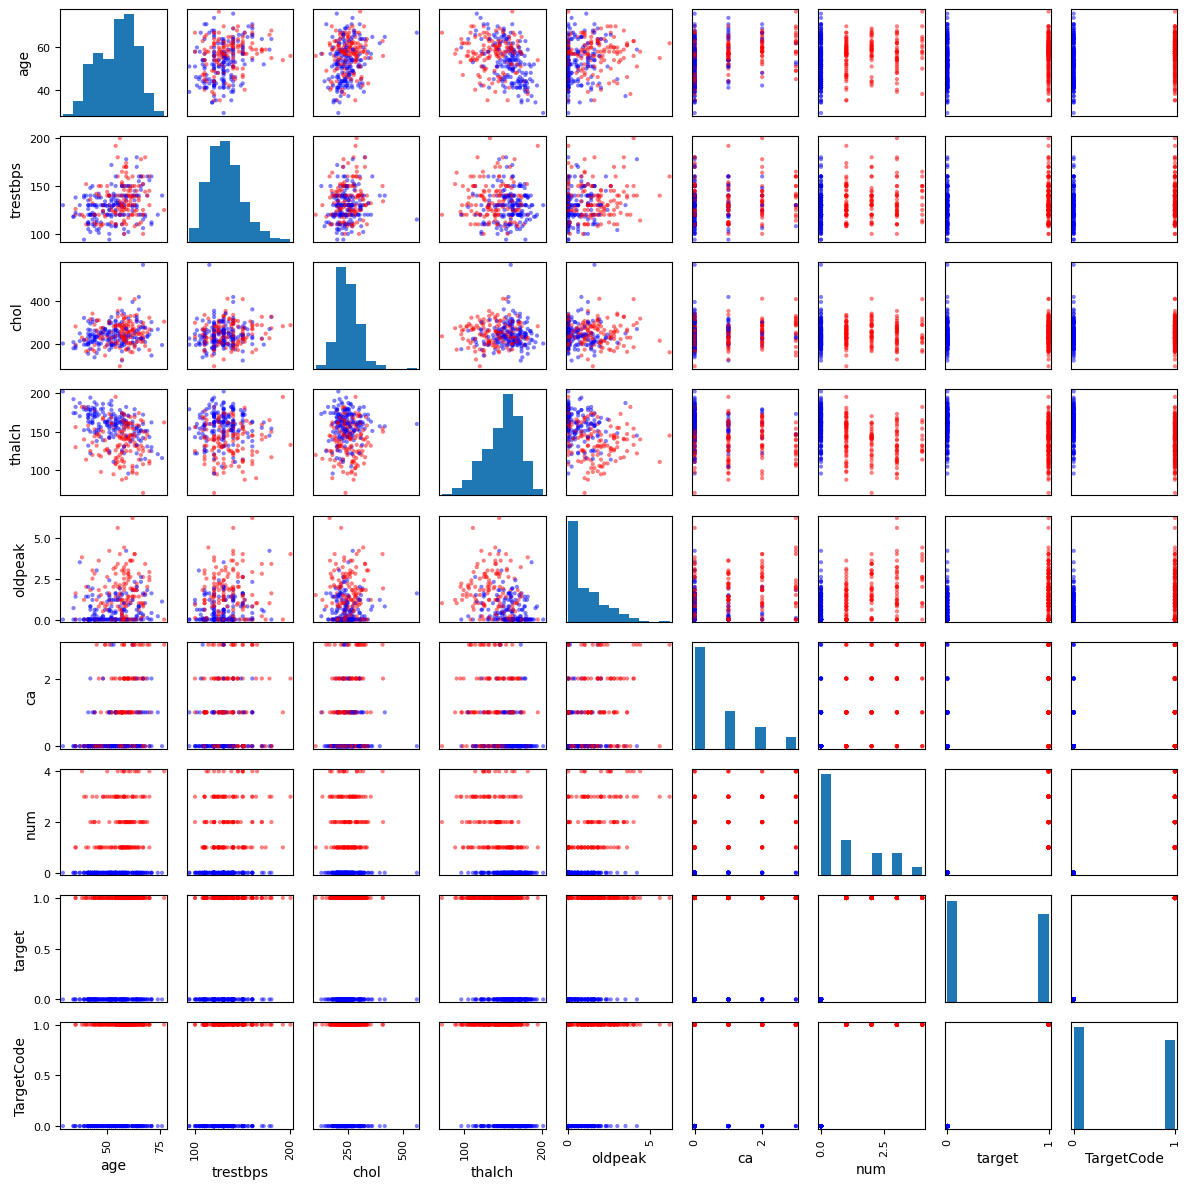

In [6]:

# Clean the DataFrame by dropping rows with missing values
df_clean = HeartRate.dropna()

# Create a numeric code for the target column
df_clean.loc[:, 'TargetCode'] = df_clean['target'].astype('category').cat.codes

# Create the scatter matrix with an increased figure size
axes = pd.plotting.scatter_matrix(
    df_clean,
    diagonal='hist',
    c=df_clean['TargetCode'],
    cmap='bwr',
    figsize=(12, 12)  # Increase figure size to reduce label overlap
)

# Adjust layout to prevent label overlap
plt.tight_layout()
# Alternatively, you can try:
# plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [30]:
for i in range(1, 921):
    print( HeartRate.loc[i, 'target'])

0
1
1
0
0
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
1
1
0
1
1
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1


In [34]:
PerceptronTest = pd.read_csv('PerceptronTest - Sheet1.csv', index_col = 0)
PerceptronTest

,trestbps,target
thalch,,
150.0,145.0,0
108.0,160.0,1
129.0,120.0,1
187.0,130.0,0
172.0,130.0,0
...,...,...
154.0,127.0,1
NaN,NaN,0
100.0,122.0,1
